In [1]:
import os
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.path.join('..','Database', 'bike_store.db')
con = sqlite3.connect(path)

In [3]:
Order_items = pd.read_sql_query('select * from Order_items', con)
Orders = pd.read_sql_query('select * from Orders', con)
Customers = pd.read_sql_query('select * from Customers', con)

## Answer to the first question:

In [93]:
df1 = pd.merge(Orders, Order_items, left_on='order_id', right_on='order_id', how='inner')

In [94]:
df1.head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,item_id,product_id,quantity,list_price,discount
0,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,1,20,1,599.99,0.20
1,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,2,8,2,1799.99,0.07
2,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,3,10,2,1549.00,0.05
3,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,4,16,2,599.99,0.05
4,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,5,4,1,2899.99,0.20


In [95]:
df1 = df1[df1['order_status'] == 4]  # To filter orders that have been sent

In [96]:
df1 = pd.merge(df1, Customers, left_on='customer_id', right_on='customer_id', how='inner')

In [97]:
df1[df1['customer_id'] == 1]

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,item_id,product_id,...,list_price,discount,first_name,last_name,phone,email,street,city,state,zip_code
1633,599,1,4,12/9/2016,12/10/2016,12/12/2016,2,6,1,9,...,2999.99,0.05,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1634,599,1,4,12/9/2016,12/10/2016,12/12/2016,2,6,2,22,...,269.99,0.20,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1635,599,1,4,12/9/2016,12/10/2016,12/12/2016,2,6,3,23,...,299.99,0.07,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1636,599,1,4,12/9/2016,12/10/2016,12/12/2016,2,6,4,10,...,1549.00,0.10,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127


In [98]:
df1.head(5)

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,item_id,product_id,...,list_price,discount,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,1,20,...,599.99,0.20,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,2,8,...,1799.99,0.07,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
2,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,3,10,...,1549.00,0.05,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
3,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,4,16,...,599.99,0.05,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
4,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2,5,4,...,2899.99,0.20,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566


In [99]:
df1 = df1.groupby('customer_id').agg(
    total_price=('list_price', 'sum')
).reset_index() 

In [107]:
df1['total_price'] = df1['total_price'].round(3)

In [108]:
df1

,customer_id,total_price
0,1,5118.97
1,2,4056.95
2,3,11199.97
3,4,7499.98
4,5,5899.98
...,...,...
1440,1441,8598.98
1441,1442,4345.96
1442,1443,9418.96
1443,1444,1149.98


/tmp/ipykernel_90191/2923022732.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'${x:,}' for x in plt.gca().get_xticks()])


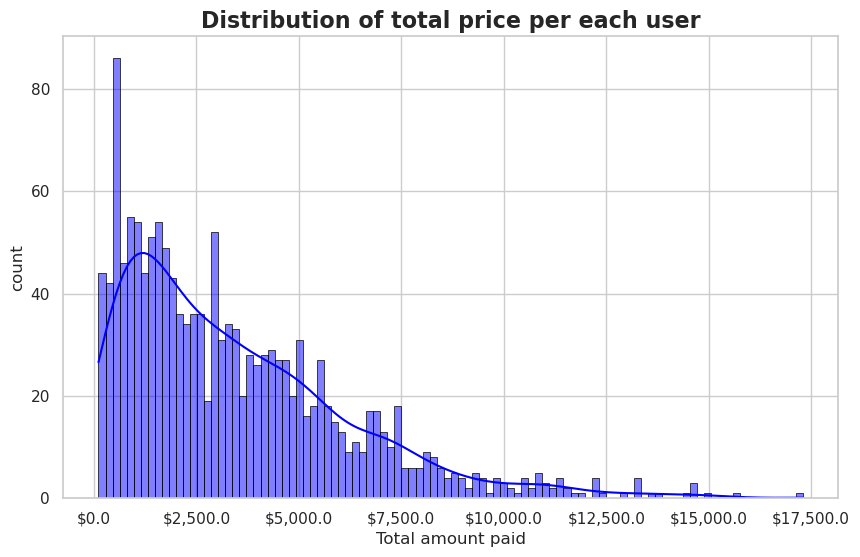

In [141]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df1['total_price'],
            bins=100,
            color='blue',
             kde=True,
            edgecolor='black')

plt.title('Distribution of total price per each user', fontsize=16, fontweight='bold')
plt.xlabel('Total Amount Paid')
plt.gca().set_xticklabels([f'${x:,}' for x in plt.gca().get_xticks()])
plt.ylabel('count')

plt.show()

In [109]:
output_path = os.path.join('..', 'output', 'python')
df1.to_csv(f'{output_path}/a1.csv', index=False) 

## Answer to the second question:

In [117]:
df2 = Orders[Orders['order_status'] == 4]
df2.head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,1/1/2016,1/3/2016,1/3/2016,1,2
1,2,1212,4,1/1/2016,1/4/2016,1/3/2016,2,6
2,3,523,4,1/2/2016,1/5/2016,1/3/2016,2,7
3,4,175,4,1/3/2016,1/4/2016,1/5/2016,1,3
4,5,1324,4,1/3/2016,1/6/2016,1/6/2016,2,6


In [118]:
df2 = df2.groupby('shipped_date').agg(
    order_count=('order_id', 'count')
).reset_index()
df2.head()

,shipped_date,order_count
0,1/1/2018,1
1,1/10/2017,3
2,1/10/2018,1
3,1/11/2016,1
4,1/11/2017,4


In [126]:
len(df2)

675

In [125]:
df2['order_count'].mean().round(0)

2.0

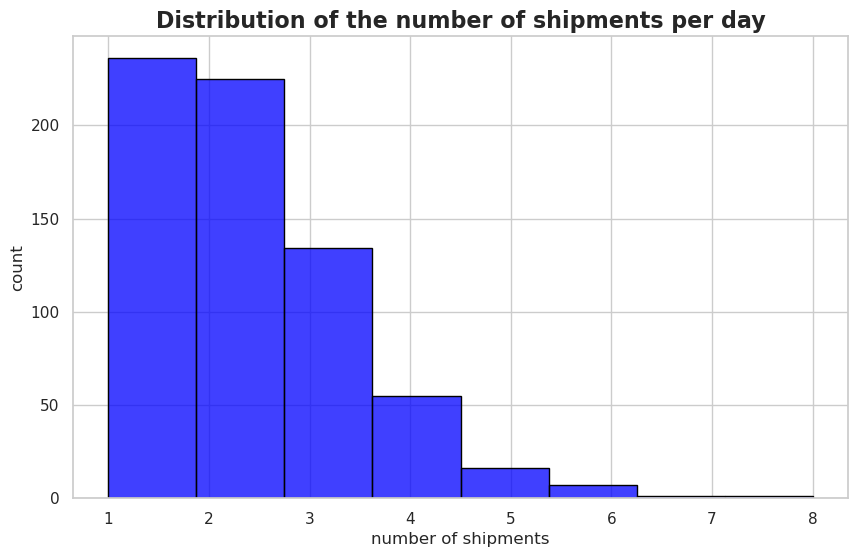

In [131]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df2['order_count'],
            bins=8,
            color='blue',
            edgecolor='black')

plt.title('Distribution of the number of shipments per day', fontsize=16, fontweight='bold')
plt.xlabel('number of shipments')
plt.ylabel('count')

plt.show()

## Answer to the third question:

In [161]:
od = Orders['order_date'].mode()
od[0]

'4/12/2018'

In [154]:
Orders.query('order_date == "4/12/2018" or order_date == "4/17/2018"')

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
1520,1521,53,1,4/12/2018,4/12/2018,None,1,3
1521,1522,78,1,4/12/2018,4/12/2018,None,1,3
1522,1523,8,1,4/12/2018,4/12/2018,None,2,7
1523,1524,37,1,4/12/2018,4/12/2018,None,2,6
1524,1525,38,2,4/12/2018,4/12/2018,None,2,7
1525,1526,59,2,4/12/2018,4/12/2018,None,2,7
1526,1527,13,2,4/12/2018,4/12/2018,None,3,9
1527,1528,20,1,4/12/2018,4/12/2018,None,3,8
1528,1529,50,1,4/12/2018,4/12/2018,None,3,8
1543,1544,5,1,4/17/2018,4/17/2018,None,1,2


In [164]:
count = Orders.query('order_date == "4/12/2018"')['store_id'].count()
print(f'The highest number of orders was in {od[0]} and {od[1]}, the number of orders: {count}')

The highest number of orders was in 4/12/2018 and 4/17/2018, the number of orders: 9
